<a href="https://colab.research.google.com/github/CoreTheGreat/HBPU-Machine-Learning-Course/blob/main/ML_Chapter3_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 第三章：分类
湖北理工学院《机器学习》课程NoteBook

学生：吴兴平

笔记内容概述: 敏感性 Specificity、特异性 Sensitivity、ROC曲线


## Step 1: 数据准备

使用make_moons生成虚拟数据构建分类任务

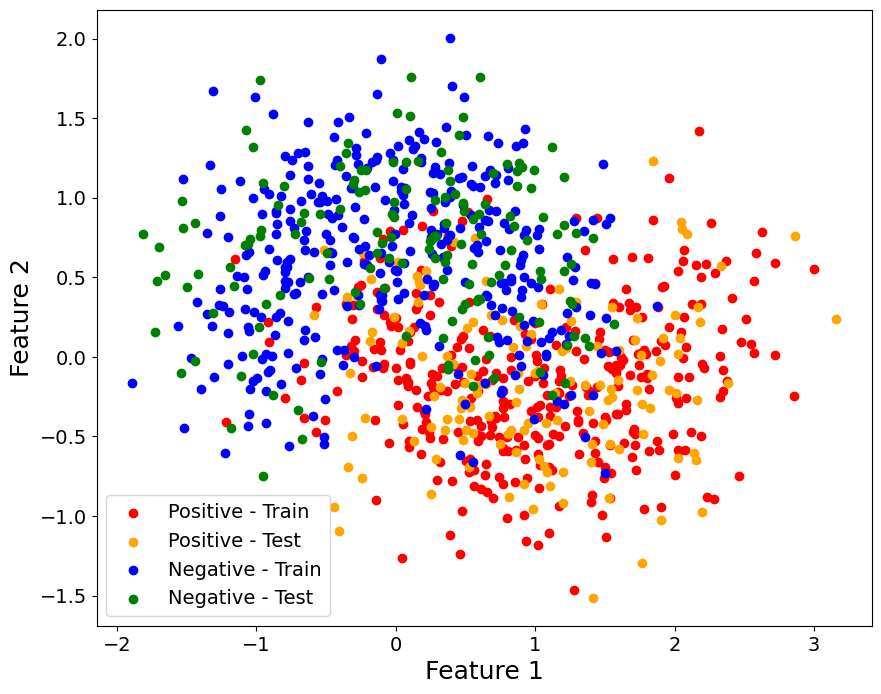

In [2]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

label_size = 18 # Label size
ticklabel_size = 14 # Tick label size

# Generate moon-shaped data
X, Y = make_moons(n_samples=1000, noise=0.4, random_state=42)

# Split X and Y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Plot the data
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], color='red', label='Positive - Train')
ax.scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1], color='orange', label='Positive - Test')
ax.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], color='blue', label='Negative - Train')
ax.scatter(X_test[y_test == 0, 0], X_test[y_test == 0, 1], color='green', label='Negative - Test')
ax.set_xlabel('Feature 1', fontsize=label_size)
ax.set_ylabel('Feature 2', fontsize=label_size)

ax.tick_params(axis='both', which='major', labelsize=ticklabel_size)

# Set legend fontsize
plt.legend(prop={'size': 14})

plt.show()

## Step 2: SVM进行分类，输出概率

In [3]:
import numpy as np
from sklearn.svm import SVC

# Model Definition
mdl_svm = SVC(probability=True)

mdl_svm.fit(X_train, y_train) # Support Vector machine
print('Support vector machine trained successfully...')

# Predict probabilities
y_proba_svm = mdl_svm.predict_proba(X_test)[:, 1]

Support vector machine trained successfully...


## Step 3: 生成混淆矩阵，计算敏感性和特异性

In [6]:
def confusion_matrix(y_pred, y):
    '''
    y_pred - predict classes
    y - actual classes
    '''
    # Get the number of classes
    n_classes = len(np.unique(y))
    
    # Initialize the confusion matrix with zeros
    cm = np.zeros((n_classes, n_classes))
    
    # Fill the confusion matrix
    for pred, actual in zip(y_pred, y):
        cm[pred][actual] += 1
    
    return cm

def get_prediction_from_proba(y_proba, threshold=0.5):
    '''
    y_proba - predict probabilities
    threshold - threshold of probability
    
    y_pred - predict classes, y_proba > threshold is positive, otherwise negative
    '''
    y_pred = np.where(y_proba > threshold, 1, 0)
    return y_pred

def get_sensitivity_specificity(y_proba, y, threshold=0.5):
    '''
    Compute sensitivity and specificity of binary classification
    y_pred - predict classes
    y - actual classes
    threshold - threshold of probability
    '''
    epsilon = 1e-10
    
    # Get the confusion matrix
    y_pred = get_prediction_from_proba(y_proba, threshold)
    cm = confusion_matrix(y_pred, y)
    
    # Compute sensitivity and specificity
    sensitivity = cm[1, 1] / (cm[1, 1] + cm[0, 1] + epsilon)
    specificity = cm[0, 0] / (cm[0, 0] + cm[1, 0] + epsilon)
    
    return sensitivity, specificity

# Get predictions from probabilities
sen_spec_svm = []
for threshold in np.linspace(0, 1, 100):
    sensitivity, specificity = get_sensitivity_specificity(y_proba_svm, y_test, threshold)
    print(f"When threshold = {threshold:0.2f} - Sensitivity: {sensitivity:.4f}, Specificity: {specificity:.4f}")
    sen_spec_svm.append([sensitivity, specificity])

# Convert to numpy array
sen_spec_svm = np.array(sen_spec_svm)

When threshold = 0.00 - Sensitivity: 1.0000, Specificity: 0.0000
When threshold = 0.01 - Sensitivity: 1.0000, Specificity: 0.0000
When threshold = 0.02 - Sensitivity: 1.0000, Specificity: 0.0000
When threshold = 0.03 - Sensitivity: 1.0000, Specificity: 0.0000
When threshold = 0.04 - Sensitivity: 1.0000, Specificity: 0.0641
When threshold = 0.05 - Sensitivity: 1.0000, Specificity: 0.1346
When threshold = 0.06 - Sensitivity: 0.9931, Specificity: 0.2436
When threshold = 0.07 - Sensitivity: 0.9931, Specificity: 0.3718
When threshold = 0.08 - Sensitivity: 0.9861, Specificity: 0.4487
When threshold = 0.09 - Sensitivity: 0.9792, Specificity: 0.5256
When threshold = 0.10 - Sensitivity: 0.9792, Specificity: 0.5513
When threshold = 0.11 - Sensitivity: 0.9792, Specificity: 0.6026
When threshold = 0.12 - Sensitivity: 0.9792, Specificity: 0.6282
When threshold = 0.13 - Sensitivity: 0.9792, Specificity: 0.6538
When threshold = 0.14 - Sensitivity: 0.9722, Specificity: 0.6795
When threshold = 0.15 - S

### Step 4: 绘制Specificity-Sensitivity曲线图

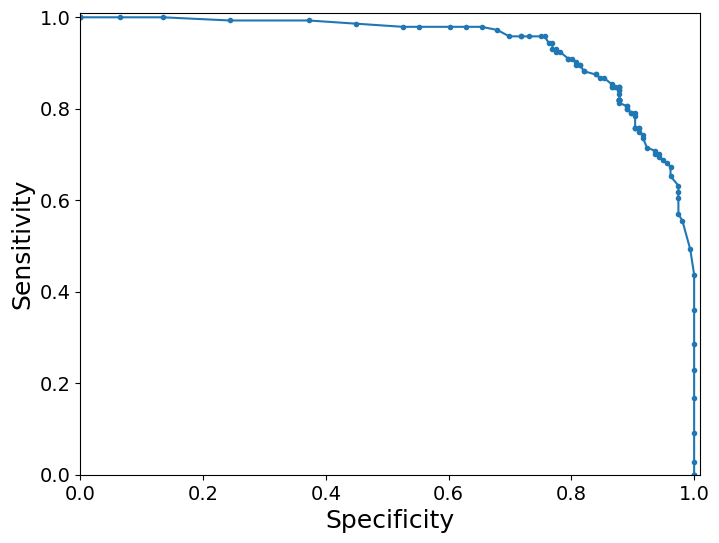

In [8]:
# Use sen_spec_svm to draw specificity-sensitivity curve
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(sen_spec_svm[:, 1], sen_spec_svm[:, 0], marker='.', color='tab:blue', label='SVM Model')
ax.set_xlabel('Specificity', fontsize=label_size)
ax.set_ylabel('Sensitivity', fontsize=label_size)
ax.tick_params(axis='both', which='major', labelsize=ticklabel_size)

# Set axis limits
ax.set_xlim([0, 1.01])
ax.set_ylim([0, 1.01])

# Save the figure
plt.savefig('Specificity_Sensitivity_Curve.png', dpi=300)
plt.show()


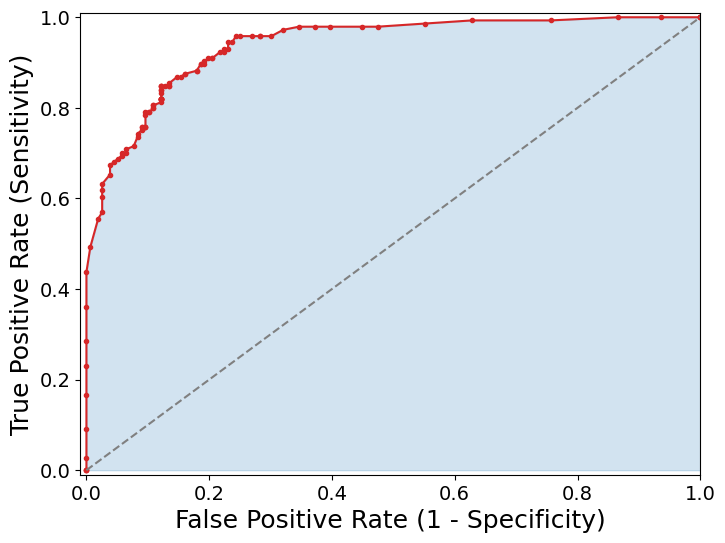

Area Under the ROC Curve (AUC): 0.9386


In [10]:
# Use sen_spec_svm to draw ROC curve
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(1 - sen_spec_svm[:, 1], sen_spec_svm[:, 0], marker='.', color='tab:red', label='SVM Model')
ax.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Classifier')
ax.set_xlabel('False Positive Rate (1 - Specificity)', fontsize=label_size)
ax.set_ylabel('True Positive Rate (Sensitivity)', fontsize=label_size)
ax.tick_params(axis='both', which='major', labelsize=ticklabel_size)

# Set axis limits
ax.set_xlim([-0.01, 1.00])
ax.set_ylim([-0.01, 1.01])

# Save the figure
plt.savefig('ROC_Curve.png', dpi=300)

# Add surface
ax.fill_between(1 - sen_spec_svm[:, 1], sen_spec_svm[:, 0], color='tab:blue', alpha=0.2)

plt.savefig('AUC.png', dpi=300)
plt.show()

# Calculate AUC
from sklearn.metrics import auc
roc_auc = auc(1 - sen_spec_svm[:, 1], sen_spec_svm[:, 0])
print(f"Area Under the ROC Curve (AUC): {roc_auc:.4f}")

